# <span style='color:Red' > Red Panda </span> 
### The complete Notebook: Algorithms and Data Structures 

In [12]:
import sys
import os
import random as rnd
from copy import deepcopy
from pprint import pprint

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
from sympy import *
import sympy as sym

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [15]:
import pandas_ta as ta

In [16]:
model_base_data_structure =  {
            'fitness':0.0,
            'mutated':False,
            'name':'unknown',
            'ticker':'',
            'leverage':0,
            'logic':'',
            'equations':{},
            'normalization_methods':{},
            'performance':{}
            }

In [17]:
global experiment_number
experiment_number = 0 

number_of_plots = 0

ROOT_PATH = sys.path[0]



#### <span style='color:Red' > **Load dataset Ethereum USD 2021** </span>  

In [18]:
path_df = sys.path[0]+'/data/ETHUSD_2021_m1.csv'
df = pd.read_csv(path_df,skiprows=0)# index_col=['date'])#,parse_dates=['date'])
df

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1640935080,2021-12-31 07:18:00,ETH/USD,3733.14,3733.14,3729.29,3729.69,0.503977,1879.678872
1,1640935020,2021-12-31 07:17:00,ETH/USD,3735.55,3735.55,3733.53,3734.44,1.711442,6391.276379
2,1640934960,2021-12-31 07:16:00,ETH/USD,3734.03,3734.03,3734.03,3734.03,0.000000,0.000000
3,1640934900,2021-12-31 07:15:00,ETH/USD,3734.03,3734.03,3734.03,3734.03,0.024000,89.616720
4,1640934840,2021-12-31 07:14:00,ETH/USD,3735.69,3735.69,3731.88,3731.88,1.204343,4494.463592
...,...,...,...,...,...,...,...,...,...
524593,1609459500,2021-01-01 00:05:00,ETH/USD,738.28,738.28,736.81,736.81,37.179474,27394.208503
524594,1609459440,2021-01-01 00:04:00,ETH/USD,738.31,738.60,738.31,738.60,36.150029,26700.411434
524595,1609459380,2021-01-01 00:03:00,ETH/USD,739.02,739.02,739.02,739.02,0.000000,0.000000
524596,1609459320,2021-01-01 00:02:00,ETH/USD,739.02,739.02,739.02,739.02,0.058408,43.164436


In [19]:
# delete useless columns
del df['unix']
del df['symbol']
del df['Volume ETH']

df.head()

,date,open,high,low,close,Volume USD
0,2021-12-31 07:18:00,3733.14,3733.14,3729.29,3729.69,1879.678872
1,2021-12-31 07:17:00,3735.55,3735.55,3733.53,3734.44,6391.276379
2,2021-12-31 07:16:00,3734.03,3734.03,3734.03,3734.03,0.000000
3,2021-12-31 07:15:00,3734.03,3734.03,3734.03,3734.03,89.616720
4,2021-12-31 07:14:00,3735.69,3735.69,3731.88,3731.88,4494.463592


#### <span style='color:Red' > **Data Preprocessing** </span>  

In [20]:
# sort values by date
df.sort_values(by=['date'], inplace=True, ascending=True)


print('FIRST datetime ',list(df['date'].head(1))[0])
print('LAST datetime ',list(df['date'].tail(1))[0])


FIRST datetime  2021-01-01 00:01:00
LAST datetime  2021-12-31 07:18:00


In [21]:
df = df.set_index('date')
df

,open,high,low,close,Volume USD
date,,,,,
2021-01-01 00:01:00,738.63,740.50,738.63,740.50,11147.529979
2021-01-01 00:02:00,739.02,739.02,739.02,739.02,43.164436
2021-01-01 00:03:00,739.02,739.02,739.02,739.02,0.000000
2021-01-01 00:04:00,738.31,738.60,738.31,738.60,26700.411434
2021-01-01 00:05:00,738.28,738.28,736.81,736.81,27394.208503
...,...,...,...,...,...
2021-12-31 07:14:00,3735.69,3735.69,3731.88,3731.88,4494.463592
2021-12-31 07:15:00,3734.03,3734.03,3734.03,3734.03,89.616720
2021-12-31 07:16:00,3734.03,3734.03,3734.03,3734.03,0.000000


In [22]:
# rename columns
df.rename({'Volume USD': 'volume'},axis=1, inplace=True)
df.head()

,open,high,low,close,volume
date,,,,,
2021-01-01 00:01:00,738.63,740.50,738.63,740.50,11147.529979
2021-01-01 00:02:00,739.02,739.02,739.02,739.02,43.164436
2021-01-01 00:03:00,739.02,739.02,739.02,739.02,0.000000
2021-01-01 00:04:00,738.31,738.60,738.31,738.60,26700.411434
2021-01-01 00:05:00,738.28,738.28,736.81,736.81,27394.208503


In [23]:
# show columns
cols = [i for i in list(df.columns)]
print(cols)

['open', 'high', 'low', 'close', 'volume']


In [24]:
# check for nan values
df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [25]:
# test pandas technical indicators
df_test_indicators = df.ta.stdev(length=10) 
df_test_indicators.tail()

date
2021-12-31 07:14:00    5.707911
2021-12-31 07:15:00    6.135934
2021-12-31 07:16:00    5.913394
2021-12-31 07:17:00    5.120345
2021-12-31 07:18:00    5.442355
Name: STDEV_10, dtype: float64

In [26]:
def compute_financial_indexes(df, financial_index):
    """
    add new column to df object with the computed financial index
    
    extract_parameters and call financial indexes equation
    df_indicators can be empty, each call of this function 
    will add a new column with the finance_indicator

       FROM     'sd-60-1' 
       TO       df['sd-60-1']
       
    """
    my_indicator = pd.Series(dtype=float)
    if '-' in financial_index:
        parameters = financial_index.split('-')

        if 'ema' in financial_index:  # SMA
                my_indicator = df.ta.ema(length= int(parameters[1]))
            
        elif 'sd' in financial_index: # SD
                my_indicator = df.ta.stdev(length= int(parameters[1]))

        elif 'roc' in financial_index:
                my_indicator = df.ta.roc(length= int(parameters[1]))

        elif 'sma' in financial_index:
                my_indicator = df.ta.sma(length= int(parameters[1]))
        else:
            pass
        
    else:
        print('MyError @ compute_financial_indexes() Problem: no index found')

    return my_indicator


In [27]:
markup_sympy = '-@'

# polynomial
max_grade_polynomial = 10         # max grade of the polinomial
min_grade_polynomial = -10
n_elemets_in_equation_poly = 5    # max number of elements allowed in the same function
min_element_ploy = 1
min_parameter_poly = -1           # min of the parameters of the equation
max_parameter_poly = 1            # max of the parameters of the equation
    
# fourier
max_grade_fourier = 10           # max grade of the fourier
min_grade_fourier = -10
n_elemets_in_equation_fourier = 5   
min_parameter_fourier = -1
max_parameter_fourier = 1

# modded fourier
max_grade_mod_fourier = 10
min_grade_mod_fourier = -10
n_elemets_in_equation_mod_fourier = 5
min_parameter_mod_fourier = -1
max_parameter_mod_fourier = 1

equation_families = ('poly','periodical')

def random_indicators(num=5):
    window_lenght = list(range(1,50))
    indicators = ['sd','ema','sma','roc']
    my_indicators = []
    for i in range(num):
        my_indicators.append(rnd.choice(indicators)+'-'+str(rnd.choice(window_lenght)))
    return my_indicators

def math_generator(seed_df,indicators_list):
    '''
    [INPUT] seed_df : pd.DataFrame
    [OUTPUT] math_df : pd.DataFrame
    
    from technical indicators to subtituted equations arrays
    
    '''
    math_df = pd.DataFrame()
    equations = dict()
    for indicator in indicators_list:
        eq_family = rnd.choice( equation_families )
        equation = check_zero_equation(choose_random_equation(eq_family))
        math_df[indicator+markup_sympy ] = subtitute_expression_to_index(seed_df[indicator],equation)
        equations[indicator]={'equation':equation,'eq_family':eq_family}
    return math_df, equations

def choose_random_equation(equation_family):
    '''
    select random equation from the allowed once
    the input dictionary is available_equations in variables
    '''
    poly = ['polynomial','base']
    periodical = ['fourier','mod_fourier']    
    
    if equation_family=='poly':
        eq_type = rnd.choice(poly)
        if eq_type == 'polynomial':
            return polynomial()
        if eq_type == 'base':
            return base()
    if equation_family=='periodical':
        eq_type = rnd.choice(periodical)
        if eq_type =='fourier':
            return fourier()
        if eq_type=='mod_fourier':
            return mod_fourier()

    else:
        print('ERROR of the function choose_random_equation() Equation Type error')


def check_zero_equation(equation):
    while equation in (0,'0'): 
        key_family = rnd.choice( equation_families )
        equation = choose_random_equation(key_family)
    return equation

def base():
    x = sym.Symbol('x')
    equation = x
    return equation
    
def polynomial():
    indexes_list = rnd.sample(range(min_grade_polynomial,max_grade_polynomial),rnd.choice(range(min_element_ploy,n_elemets_in_equation_poly)))#,``
    parameters_list = [rnd.choice(np.linspace(min_parameter_poly, max_parameter_poly)) for i in range(len(indexes_list))]  # could be 0
    x = sym.Symbol('x')
    equation = sum(k * x ** i for k, i in zip(parameters_list, indexes_list))

    return equation

def fourier():
    indexes_list = rnd.sample(range(min_grade_fourier,max_grade_fourier), rnd.choice(range(n_elemets_in_equation_fourier)))
    list_parameters_1 = np.random.randint(1,10,size=len(indexes_list))
    list_parameters_2 = np.random.randint(1,10,size=len(indexes_list))
    x = sym.Symbol('x')
    equation = sum(k * sym.sin(x) ** i - j * sym.cos(x) ** i for j, k, i in
                        zip(list_parameters_1, list_parameters_2,indexes_list))
    if type(equation) is not int:
        equation = equation.simplify()
    return equation

def mod_fourier():
    indexes_list = rnd.sample(range(min_grade_mod_fourier,max_grade_mod_fourier),rnd.choice(range(n_elemets_in_equation_mod_fourier))) 
    list_parameters_1 = np.random.randint(1,10,size=len(indexes_list)) # min, max, size
    list_parameters_2 = np.random.randint(1,10,size=len(indexes_list))
    x = sym.Symbol('x')
    equation = sum(k * sym.sin(x) ** i - j * sym.cos(x) ** i for j, k, i in
                        zip(list_parameters_1, list_parameters_2,indexes_list))
    if type(equation) is not int :
        equation = equation.simplify()                    
    return equation

def subtitute_expression_to_index(my_array,equation): 
    """
    Apply the equation to the array   
    [IN] x: sympy symbol, x can be also be  (x,y,z,k)
         equation: str or sympy equation
    [OUT] signal_data: np.bool()
    """
    f = lambdify(x, equation,"numpy")     
    signal_data = f(my_array)            
    return(signal_data)


#print(df.tail())
indicators = random_indicators(num=5)
#print(indicators)

new_df = pd.DataFrame()
for indicator in indicators:
    new_df[indicator] = compute_financial_indexes(df,indicator)

print(new_df)

                          sma-39       sma-47       sma-27       sma-14  \
date                                                                      
2021-01-01 00:01:00          NaN          NaN          NaN          NaN   
2021-01-01 00:02:00          NaN          NaN          NaN          NaN   
2021-01-01 00:03:00          NaN          NaN          NaN          NaN   
2021-01-01 00:04:00          NaN          NaN          NaN          NaN   
2021-01-01 00:05:00          NaN          NaN          NaN          NaN   
...                          ...          ...          ...          ...   
2021-12-31 07:14:00  3742.196923  3742.308298  3744.039259  3744.557857   
2021-12-31 07:15:00  3742.013590  3742.069574  3743.856667  3743.891429   
2021-12-31 07:16:00  3741.894872  3741.846383  3743.567407  3742.887857   
2021-12-31 07:17:00  3741.786667  3741.695745  3743.347037  3741.923571   
2021-12-31 07:18:00  3741.511282  3741.485532  3742.839630  3740.487857   

                       r

In [28]:
for idx in list(new_df.columns):
    print(idx)

sma-39
sma-47
sma-27
sma-14
roc-28


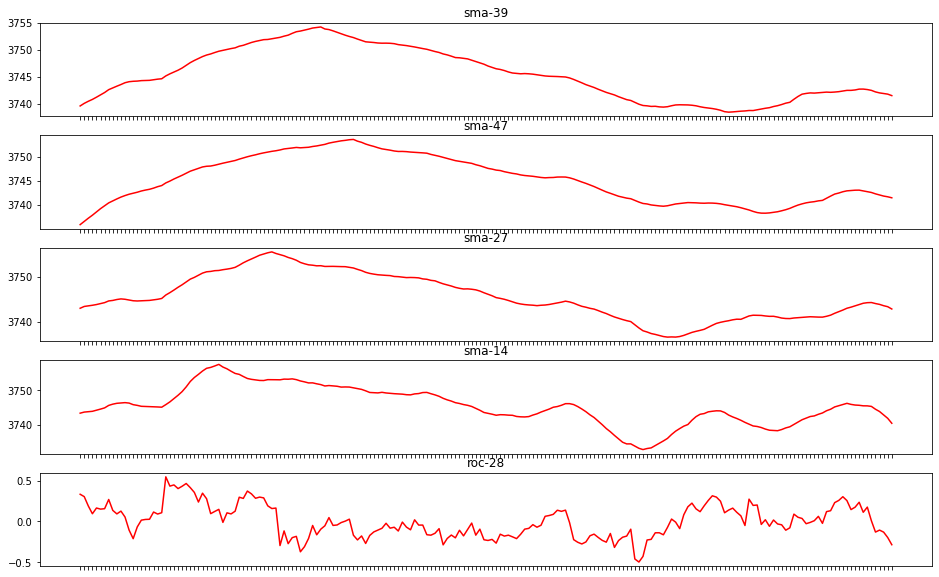

In [29]:
ROOT_PATH = sys.path[0]

def plot_indicators(df):
    figure, axis = plt.subplots(len(list(df.columns)), 1,figsize=(16, 10))

    for idx in range(len(df.columns)):
        axis[idx].plot(df[df.columns[idx]].tail(200),color='red')
        axis[idx].set_title(df.columns[idx])
        axis[idx].set(xticklabels=[])
    
    plt.savefig(ROOT_PATH + f"/runs/experiment_{experiment_number}/bot_{number_of_plots}_indicators.png")
    #plt.show()

plot_indicators(new_df)

### <span style='color:#ff4e4e'> **Mathematics equations** </span>

In [30]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n', integer=True)
print(x,y,z,k,m,n)

x y z k m n


In [31]:
str_expr = "sin(x)**2 + cos(3)*x - 1/2"
str_expr2 = "2*sin(x)**2 + cos(3)*x"
str_expr3 = "0"

In [32]:
check_zero_equation(equation = str_expr3)

0.306122448979592/x**6

In [33]:
sympy_df, equations = math_generator(seed_df = new_df, indicators_list = indicators)
print(equations)
print(sympy_df.tail(20))

{'sma-39': {'equation': 6*sin(x)**9 - cos(x)**9 - 9/cos(x)**3 - 1/cos(x)**7 - 3/cos(x)**10 + 4/sin(x)**3 + 9/sin(x)**7 + 6/sin(x)**10, 'eq_family': 'periodical'}, 'sma-47': {'equation': x, 'eq_family': 'poly'}, 'sma-27': {'equation': x, 'eq_family': 'poly'}, 'sma-14': {'equation': 2*sin(x)**3 - 2*cos(x)**3 - 1/cos(x)**10 + 2/sin(x)**10, 'eq_family': 'periodical'}, 'roc-28': {'equation': x, 'eq_family': 'poly'}}
                         sma-39-@     sma-47-@     sma-27-@      sma-14-@  \
date                                                                        
2021-12-31 06:59:00  3.202403e+05  3740.679787  3741.089259 -3.567933e+02   
2021-12-31 07:00:00  7.424889e+04  3740.846596  3741.055926 -2.275308e+09   
2021-12-31 07:01:00  2.556526e+04  3740.946170  3741.047037 -6.707529e+05   
2021-12-31 07:02:00  5.078116e+03  3741.394681  3741.233704  2.731370e+02   
2021-12-31 07:03:00  1.014963e+04  3741.840213  3741.484074  8.477937e+06   
2021-12-31 07:04:00  4.085416e+03  3742.262340

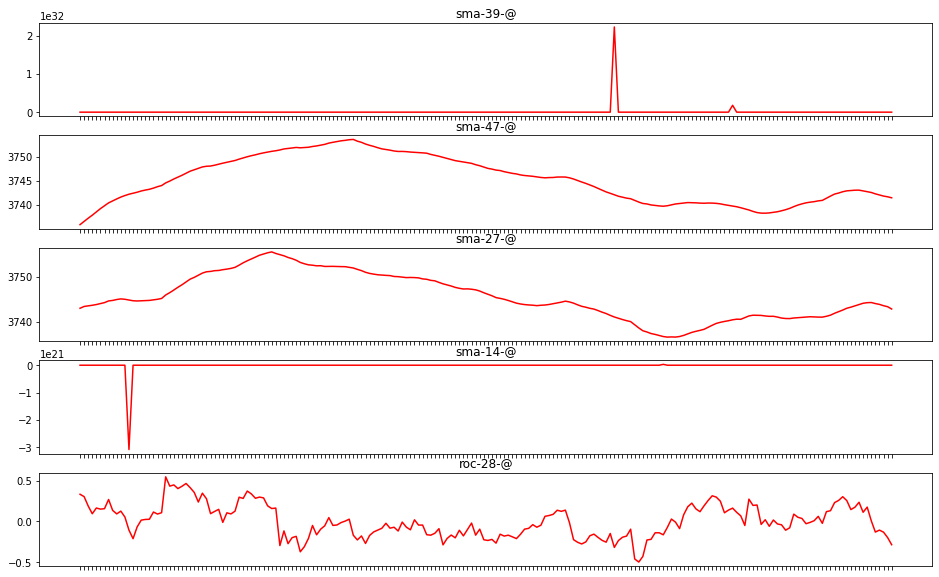

In [34]:
plot_indicators(sympy_df)

In [35]:
print('DATA-TYPE '+str(type(sympy_df)))

DATA-TYPE <class 'pandas.core.frame.DataFrame'>


In [36]:
available_normalizations=['n1','n2','n3','n4','n5','n6','n7']

In [37]:
available_normalizations[rnd.randint(0,len(available_normalizations)-1)]

'n1'

In [38]:
def apply_normalization(nparray,method='n1'):
    """
    apply the normalization method to the array of numbers
    must be applied to arrays and not direct to equation
    """
    n_type = method
    if n_type=='n1':
        return n1(nparray)
    elif n_type=='n2':
        return n2(nparray)
    elif n_type=='n3':
        return n3(nparray)
    elif n_type=='n4':
        return n4(nparray)
    elif n_type=='n5':
        return n5(nparray)
    elif n_type=='n6':
        return n6(nparray)
    elif n_type=='n7':
        return n7(nparray)  
    else:
        print(' normalization type error')

#@jit(nopython=True)
def n1(nparray):
    """ ( array - Min) / (Max - Min) """
    return (nparray - np.min(nparray)) / (np.max(nparray) - np.min(nparray))
    
#@jit(nopython=True)
def n2(nparray):
    """(array - mean) / sd """
    return (nparray - np.mean(nparray) ) / np.std(nparray)

#@jit(nopython=True)
def n3(nparray):
    """(array - mean) / var """
    return (nparray - np.mean(nparray) ) / np.var(nparray)

#@jit(nopython=True)
def n4(nparray):
    """(array - mean) / (Max - min) """
    return (nparray - np.mean(nparray)) / (np.max(nparray) - np.min(nparray))

#@jit(nopython=True)
def n5(nparray):
    """ 1 / (1 + e^(-i)) """
    e = 2.71828
    return 1 / (1 + e**(-nparray))

#@jit(nopython=True)
def n6(nparray):
    """ log(i) / (1 - log(i) ) """
    return np.log10(np.absolute(nparray)) / (1 - np.log10(np.absolute(nparray)))

#@jit(nopython=True)
def n7(nparray):
    var = rnd.random()
    return 1 / (1 + (1+var)**(-nparray))

n1


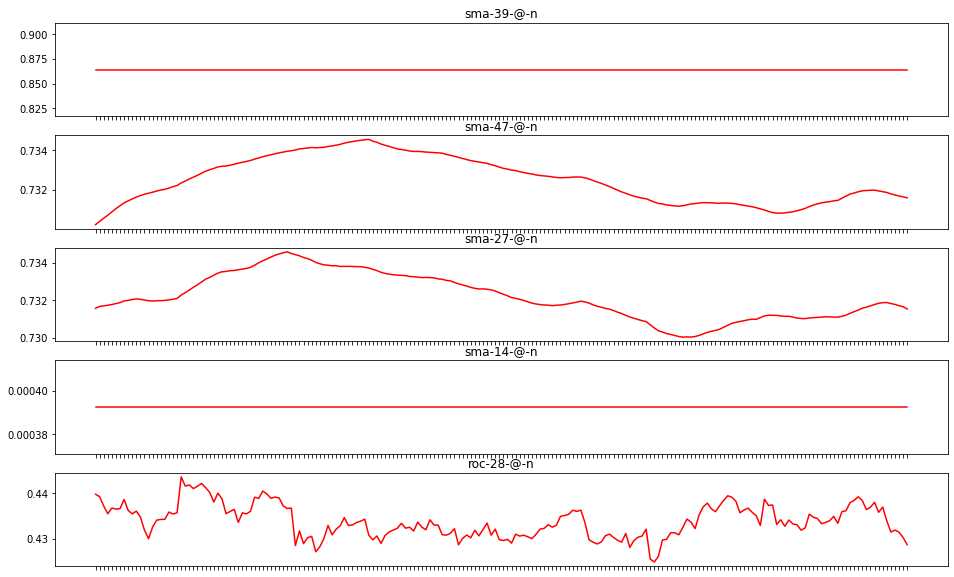

In [39]:
random_method = available_normalizations[rnd.randint(0,len(available_normalizations)-1)]
print(random_method)
final_df = pd.DataFrame()
markup_normalization = '-n'
for idx in sympy_df.columns:
    final_df[idx+markup_normalization] = pd.Series(apply_normalization(sympy_df[idx],random_method))

plot_indicators(final_df)

In [40]:
cols = final_df.columns
a = final_df[cols[-3]].tail(200)
b = final_df[cols[-1]].tail(200)

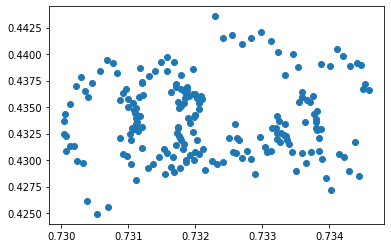

In [41]:
plt.scatter(a,b)

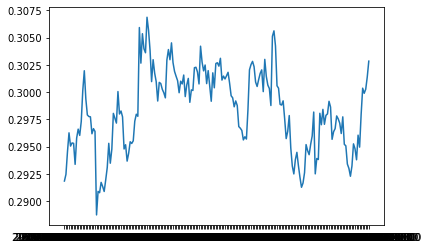

In [42]:
c = a-b
plt.plot(c.tail(200))

In [43]:
d = b > a  
f = c < (a+b)

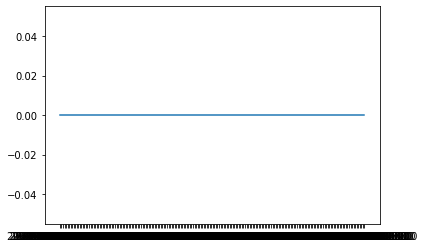

In [44]:
plt.plot(d)

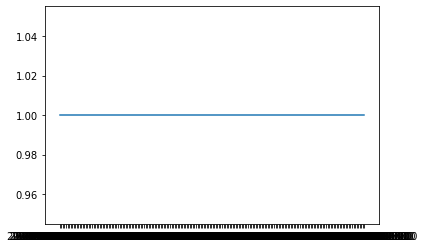

In [45]:
plt.plot(f)

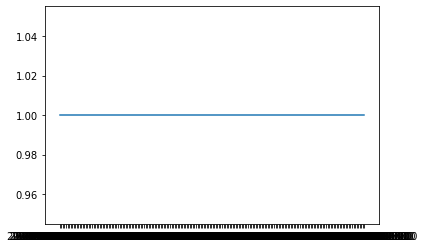

In [46]:
plt.plot(d < f)

In [47]:
logic = ' A > B '

name_df_ram = 'final_df'


cols = final_df.columns
keyA = cols[0]
keyB = cols[1]

logic = logic.replace('A' , name_df_ram + "['" + keyA + "']")
logic = logic.replace('B' , name_df_ram + "['" + keyB + "']")

logic

" final_df['sma-39-@-n'] > final_df['sma-47-@-n'] "

## <span style='color:Red'> Generate Signal with _eval()_ & Logic String </span>

In [48]:
min_index_number_allowed = 2
max_index_number_allowed = 20
numer_of_disequations=10
and_or = ['and' , 'or']
math_symbols = ['/' , '*' , '+' , '-' , '**' , 'log' , 'ln']
major_minor = ['>' , '<']
br_open = ['(' , '']
br_close = [')' , '']
not_valid_eq = (' ','','(( )','( ))','(())','()')

elements_names = ['🐶','🐒','🦍','🐺','🦝','🦊','🦁','🐯']

def random_name(names):
    name=''
    for i in range(1):
        name+=rnd.choice(names)
    return name

def R(number_choice=2):
    return(rnd.randrange(0,number_choice))

def generate_logic_rules(dataframe_name='df',names=['🐶','🐒','🦍','🐺','🦝','🦊','🦁','🐯']):    
    """ GENERATE LOGIC WITH COMPARISON OF SIMILAR INDEXES
    """
    operation_trading_rule= ''

    index_number = rnd.randrange(min_index_number_allowed, max_index_number_allowed)
    while operation_trading_rule in not_valid_eq:
        for i in range(index_number):
            operation_trading_rule=''
            flag_external=False
            number_of_disequations = rnd.choice(range(numer_of_disequations))
            for j in range(number_of_disequations):
                
                logic_operator = '' # (Q<N)
                idx1= random_name(names)
                idx2= random_name(names)

                if flag_external==True: # CLOSE EXTERNAL BRACKET
                    if j==number_of_disequations-2:
                        operation_trading_rule+=' ) '
                    if rnd.random()>.8:
                        operation_trading_rule+=' ) '
                        flag_external=False
                        x=0

                if j>0 and j<numer_of_disequations : # ADD LOGIC: AND, OR
                    operation_trading_rule+=rnd.choice(and_or) 

                if flag_external==False and j<numer_of_disequations-2 and rnd.random()>.8:
                    #operation_trading_rule+=' ( '
                    flag_external=True
                    x=j
                
                logic_operator = " ( "+dataframe_name+"['"+idx1+"']  " +major_minor[R()]+" "+dataframe_name+"['"+idx2+"'] ) "
                operation_trading_rule+=logic_operator
                

    diff = int(operation_trading_rule.count(')'))-int(operation_trading_rule.count('('))
    if diff<0:
        operation_trading_rule = operation_trading_rule+')'*diff
    elif diff>0:
        operation_trading_rule = '('*diff+operation_trading_rule
    else:
        pass
    
    return operation_trading_rule

generate_logic_rules(names=final_df.columns)

"( ( df['roc-28-@-n']  < df['roc-28-@-n'] ) or ( df['sma-47-@-n']  < df['sma-27-@-n'] ) and ( df['roc-28-@-n']  > df['roc-28-@-n'] ) or ( df['roc-28-@-n']  > df['sma-47-@-n'] ) or ( df['sma-27-@-n']  < df['roc-28-@-n'] ) and ( df['sma-14-@-n']  < df['sma-39-@-n'] )  ) and ( df['sma-39-@-n']  < df['roc-28-@-n'] ) and ( df['sma-39-@-n']  > df['sma-27-@-n'] ) and ( df['sma-47-@-n']  < df['sma-47-@-n'] ) "

In [49]:
operation_trading_rule = ' ( a>b ) or ( c<d ) and (  ( e>f ) and ( g<h ) '

In [50]:
operation_trading_rule.count('(')  - operation_trading_rule.count(')')

1

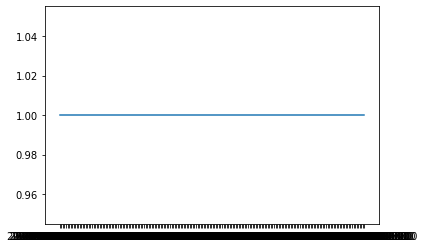

In [51]:
signal = eval(logic) # EVALUATION
plt.plot(signal.tail(200))

In [52]:
signal.any()

True

In [53]:
type(signal)

pandas.core.series.Series

In [54]:
# df_price['signal'] = df_price['signal'].map({False: 'pass', True: 'open'})

In [55]:
df.head(5)

,open,high,low,close,volume
date,,,,,
2021-01-01 00:01:00,738.63,740.50,738.63,740.50,11147.529979
2021-01-01 00:02:00,739.02,739.02,739.02,739.02,43.164436
2021-01-01 00:03:00,739.02,739.02,739.02,739.02,0.000000
2021-01-01 00:04:00,738.31,738.60,738.31,738.60,26700.411434
2021-01-01 00:05:00,738.28,738.28,736.81,736.81,27394.208503


In [56]:
df['signal'] = signal

In [57]:
df.tail(5)

,open,high,low,close,volume,signal
date,,,,,,
2021-12-31 07:14:00,3735.69,3735.69,3731.88,3731.88,4494.463592,True
2021-12-31 07:15:00,3734.03,3734.03,3734.03,3734.03,89.616720,True
2021-12-31 07:16:00,3734.03,3734.03,3734.03,3734.03,0.000000,True
2021-12-31 07:17:00,3735.55,3735.55,3733.53,3734.44,6391.276379,True
2021-12-31 07:18:00,3733.14,3733.14,3729.29,3729.69,1879.678872,True


In [58]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'signal'], dtype='object')

### <span style='color:Blue'> Backtest signal </span>
df pd.DataFrame() <br>
Columns ['open', 'high', 'low', 'close', 'volume', 'signal']<br>
datetime as Index

In [59]:
take_profit=0.005
stop_loss = 0.01

buffer_period = 200

def backtest(df , equity=100_000,print_operations=False):
    """ df pd.DataFrame()
    Columns ['open', 'high', 'low', 'close', 'volume', 'signal']
    datetime as Index
    """
    initial_investment = equity    
    
    open_operation = False
    id_op=0
    gain=0
    equity_history=[]
        
    for i in range(buffer_period):
        equity_history.append(equity)
    
    for i in range(buffer_period, len(df)):
#         if equity <= initial_investment*0.7:
#              continue
        if open_operation==False:
            if df['signal'][i] == 1: # Open Long position #####
                open_operation = True
                id_op+=1
                op_open_price = deepcopy(df['close'][i])
                op_open_date = deepcopy(df.index[i])
                size_order = equity / df['close'][i] 
                if print_operations:   
                    print(' id: ',id_op)
                    print(' open long position date:',op_open_date)
                    print(' price opening operation:',op_open_price)
                    print(' Signal datetime ',df.index[i])
                    print(' equity: ',round(equity,2))
                    print(' size order: ',size_order)
                    print('-'*80)

        actual_price = df['close'][i] 
        #actual_date = deepcopy(df.index[i])

        if open_operation==True: # Open buy price
            gain =  size_order * (actual_price-op_open_price)         
            real_TP = take_profit*equity
            real_SL = stop_loss*equity
            #timedelta = (actual_date-op_open_date)/60 # minutes between open operation time and now 

            if ( (gain > real_TP) or (gain < -real_SL) ):# and timedelta.seconds >30000:  # Close Long position ###        
                open_operation = False
                equity += gain
                gain=0

                if print_operations:   

                    print(' id: ',id_op)
                
                    #print(' open long position date:  ',op_open_date)
                    #print(' close long position date:  ',actual_date)
                    
                    print(' price opening operation:',op_open_price)
                    print(' prince closing operation: ',actual_price)
                    
                    print(' equity: ',round(equity,2))
                    print(' size order: ',size_order)
                    print(' gain ',round(gain,3),'$')
                    print('-'*80)
                    
        equity_history.append(equity)
    return equity_history

df['trading strategy'] = backtest( df ) # DEPLOY
#test = backtest( df_price[:50000])
#print(test[-1])

In [60]:
investment = 100_000
initial_amout = investment / df['close'][0]

In [62]:
name_file_benchmark = 'snp500_2021.csv'

#print(sys.path[0]+'/src/data/'+name_file_benchmark)
df_benchmark = pd.read_csv(sys.path[0]+'/data/'+name_file_benchmark, index_col=0)
df_benchmark

,Close,Open,High,Low
Date,,,,
12/31/2021,4766.18,4775.21,4786.83,4765.75
12/30/2021,4778.73,4794.23,4808.93,4775.33
12/29/2021,4793.06,4788.64,4804.06,4778.08
12/28/2021,4786.35,4795.49,4807.02,4780.04
12/27/2021,4791.19,4733.99,4791.49,4733.99
...,...,...,...,...
01/08/2021,3824.68,3815.05,3826.69,3783.60
01/07/2021,3803.79,3764.71,3811.55,3764.71
01/06/2021,3748.14,3712.20,3783.04,3705.34


In [63]:

df_benchmark.sort_values(by=['Date'], inplace=True, ascending=True)
df_benchmark

,Close,Open,High,Low
Date,,,,
01/04/2021,3700.65,3764.61,3769.99,3662.71
01/05/2021,3726.86,3698.02,3737.83,3695.07
01/06/2021,3748.14,3712.20,3783.04,3705.34
01/07/2021,3803.79,3764.71,3811.55,3764.71
01/08/2021,3824.68,3815.05,3826.69,3783.60
...,...,...,...,...
12/27/2021,4791.19,4733.99,4791.49,4733.99
12/28/2021,4786.35,4795.49,4807.02,4780.04
12/29/2021,4793.06,4788.64,4804.06,4778.08


In [64]:
def load_benchmark():
    df_benchmark = pd.read_csv(sys.path[0]+'/source/data/'+name_file_benchmark, index_col=0)
    df_benchmark.sort_values(by=['Date'], inplace=True, ascending=True)
    return df_benchmark

In [ ]:
len(df_benchmark)

252

In [ ]:
len(df)

524598

In [ ]:
524598/252

2081.7380952380954

In [ ]:
np.linspace(1, 10, num=20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [ ]:
df_benchmark

,Close,Open,High,Low
Date,,,,
01/04/2021,3700.65,3764.61,3769.99,3662.71
01/05/2021,3726.86,3698.02,3737.83,3695.07
01/06/2021,3748.14,3712.20,3783.04,3705.34
01/07/2021,3803.79,3764.71,3811.55,3764.71
01/08/2021,3824.68,3815.05,3826.69,3783.60
...,...,...,...,...
12/27/2021,4791.19,4733.99,4791.49,4733.99
12/28/2021,4786.35,4795.49,4807.02,4780.04
12/29/2021,4793.06,4788.64,4804.06,4778.08


In [ ]:
a=[1,2,3]
b=[5,6,7]
a.extend(b)
a

[1, 2, 3, 5, 6, 7]

In [ ]:
new_series = []
for i in range(1,len(df_benchmark)):
    new_series.extend(list(np.linspace(df_benchmark['Close'][i-1],df_benchmark['Close'][i],)))

print(len(new_series))

12550


In [65]:
import math
math.floor(2.4)

2

In [66]:
# reduce the size of the dataframe
number_of_points = len(df_benchmark)
idx = list(range( 0 ,len(df['trading strategy']), math.floor(len(df['trading strategy'])/number_of_points) ))
trading_strategy_gain = [df['trading strategy'][i] for i, _ in enumerate(df['trading strategy']) if i in idx][1:]

len(trading_strategy_gain)

252

In [107]:
print(len(  df_benchmark['Close'] ))
print(len(  df['close'] ))

252
524598


In [110]:
def reduce_size(time_series,n_points = 300):
    idx = np.arange( 1 ,len(time_series) , math.floor(len(time_series)/n_points))
    return pd.Series([time_series[i] for i in idx])

ts = reduce_size( df_benchmark['Close'] ,n_points = 40)

print(ts)
print(df_benchmark)

0     3726.86
1     3809.84
2     3841.47
3     3773.86
4     3911.23
5     3913.97
6     3811.15
7     3821.35
8     3962.71
9     3889.14
10    4019.87
11    4127.99
12    4134.94
13    4183.18
14    4201.62
15    4173.85
16    4197.05
17    4208.12
18    4239.18
19    4166.45
20    4290.61
21    4358.13
22    4360.03
23    4411.79
24    4387.16
25    4436.75
26    4400.27
27    4470.00
28    4535.43
29    4443.05
30    4395.64
31    4307.54
32    4391.34
33    4486.46
34    4574.79
35    4660.57
36    4649.27
37    4697.96
38    4567.00
39    4701.21
40    4668.67
41    4791.19
dtype: float64
              Close     Open     High      Low
Date                                          
01/04/2021  3700.65  3764.61  3769.99  3662.71
01/05/2021  3726.86  3698.02  3737.83  3695.07
01/06/2021  3748.14  3712.20  3783.04  3705.34
01/07/2021  3803.79  3764.71  3811.55  3764.71
01/08/2021  3824.68  3815.05  3826.69  3783.60
...             ...      ...      ...      ...
12/27/2021  4791.19  

In [75]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [ ]:
df['signal'].any()

True

In [ ]:
df['signal']

date
2021-01-01 00:01:00    False
2021-01-01 00:02:00    False
2021-01-01 00:03:00    False
2021-01-01 00:04:00    False
2021-01-01 00:05:00    False
                       ...  
2021-12-31 07:14:00     True
2021-12-31 07:15:00     True
2021-12-31 07:16:00     True
2021-12-31 07:17:00     True
2021-12-31 07:18:00     True
Name: signal, Length: 524598, dtype: bool

In [111]:

df_benchmark = load_benchmark()
number_of_shares = math.floor(df_benchmark['Close'][0]/initial_amout)
benchmark_data = number_of_shares * df_benchmark['Close']



FileNotFoundError: [Errno 2] No such file or directory: '/home/kobayashi/Documents/finance/redpanda/source/data/snp500_2021.csv'

In [68]:
%matplotlib auto

Using matplotlib backend: TkAgg


0       740.50
1       739.02
2       739.02
3       738.60
4       736.81
         ...  
997     737.69
998     738.68
999     737.58
1000    738.20
1001    738.20
Length: 1002, dtype: float64

In [78]:
plt.figure(figsize=(25,16))
plt.plot(reduce_size(df['signal'] ,1000).map({False : min(df['close']),True : max(df['close'])}), color='green',marker='s', linewidth=1, markersize=1) 
plt.plot(reduce_size(df['close'] ,1000) , color='black', linewidth=1) 
plt.show()
# linestyle='dashed'

In [ ]:
df

,open,high,low,close,volume,signal,trading strategy
date,,,,,,,
2021-01-01 00:01:00,738.63,740.50,738.63,740.50,11147.529979,False,100000.000000
2021-01-01 00:02:00,739.02,739.02,739.02,739.02,43.164436,False,100000.000000
2021-01-01 00:03:00,739.02,739.02,739.02,739.02,0.000000,False,100000.000000
2021-01-01 00:04:00,738.31,738.60,738.31,738.60,26700.411434,False,100000.000000
2021-01-01 00:05:00,738.28,738.28,736.81,736.81,27394.208503,False,100000.000000
...,...,...,...,...,...,...,...
2021-12-31 07:14:00,3735.69,3735.69,3731.88,3731.88,4494.463592,True,215568.118337
2021-12-31 07:15:00,3734.03,3734.03,3734.03,3734.03,89.616720,True,215568.118337
2021-12-31 07:16:00,3734.03,3734.03,3734.03,3734.03,0.000000,True,215568.118337


In [ ]:
benchmark_data

Date
01/04/2021     99917.55
01/05/2021    100625.22
01/06/2021    101199.78
01/07/2021    102702.33
01/08/2021    103266.36
                ...    
12/27/2021    129362.13
12/28/2021    129231.45
12/29/2021    129412.62
12/30/2021    129025.71
12/31/2021    128686.86
Name: Close, Length: 252, dtype: float64

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib auto

Using matplotlib backend: TkAgg


In [ ]:
plt.figure(figsize=(25,16))

plt.plot(reduce_size(df['trading strategy'] ,len(benchmark_data)), color='indigo', linewidth=1) 
plt.plot(benchmark_data , color='darkblue', linewidth=1) 


In [ ]:
df_plot_trading = pd.DataFrame()
df_plot_trading['signal'] = reduce_size(df['signal'] ,1000)
df_plot_trading['close'] = reduce_size(df['close'] ,1000)


df_plot_trading

,signal,close
1,True,730.48
2,True,735.05
3,True,733.49
4,True,731.15
5,True,786.29
...,...,...
997,True,3746.18
998,False,3655.09
999,False,3741.55
1000,False,3736.23


In [ ]:
df_plot_trading['signal'][1] == True

True

In [ ]:
print(df_plot_trading.index)

RangeIndex(start=1, stop=10089, step=1)


In [ ]:
plot_marker_series = []
date_marker_series = []

for i in df_plot_trading.index:
    if df_plot_trading['signal'][i]:
        plot_marker_series.append(df_plot_trading['close'][i])
        date_marker_series.append(i)

plt.figure(figsize=(25,16))
plt.scatter(date_marker_series,plot_marker_series, marker='^', color='lime') 
plt.plot( df_plot_trading['close'], color='black', linewidth=1) 


In [ ]:
import datetime

# format the date to be used in the plot
dt_string = df.index[0]
print(dt_string)
format = "%Y-%m-%d %H:%M:%S"
print(dt_string,type(dt_string))
dt_object = datetime.datetime.strptime(dt_string, format)
print(dt_object,type(dt_object))

2021-01-01 00:01:00
2021-01-01 00:01:00 <class 'str'>
2021-01-01 00:01:00 <class 'datetime.datetime'>


In [ ]:
df_benchmark

,Close,Open,High,Low
Date,,,,
01/04/2021,3700.65,3764.61,3769.99,3662.71
01/05/2021,3726.86,3698.02,3737.83,3695.07
01/06/2021,3748.14,3712.20,3783.04,3705.34
01/07/2021,3803.79,3764.71,3811.55,3764.71
01/08/2021,3824.68,3815.05,3826.69,3783.60
...,...,...,...,...
12/27/2021,4791.19,4733.99,4791.49,4733.99
12/28/2021,4786.35,4795.49,4807.02,4780.04
12/29/2021,4793.06,4788.64,4804.06,4778.08


### Exploratory report

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from matplotlib import colors
import matplotlib.ticker as ticker


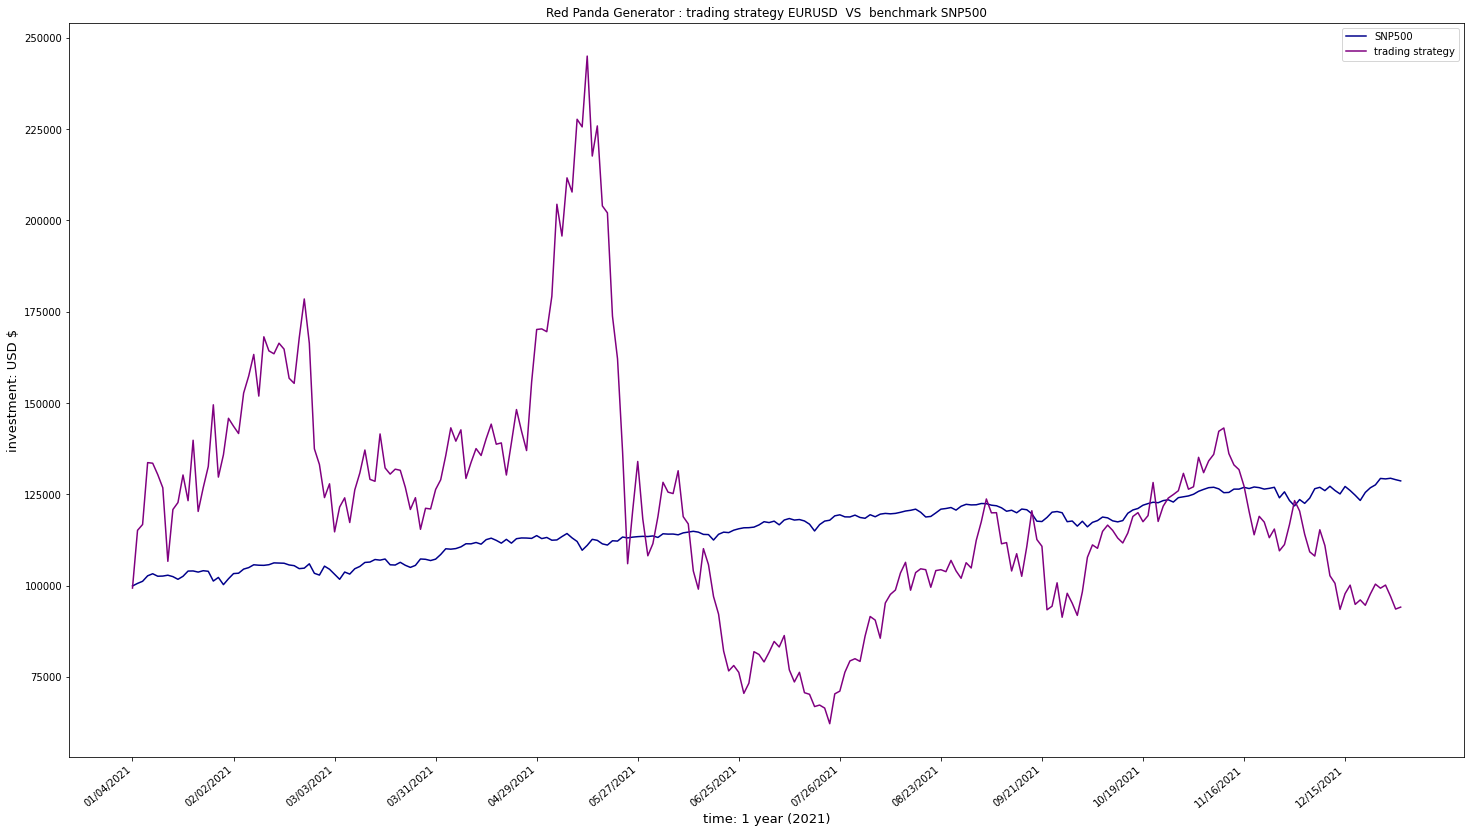

In [ ]:

def plot_strategy_vs_benchmark(trading_strategy,benchmark):
    # plot the trading strategy
    plt.figure(figsize=(25,15))
    plt.clf()
    plt.style.use('seaborn-pastel')
    plt.plot(benchmark,color='darkblue')
    plt.plot(trading_strategy,color='purple')
    plt.legend(['SNP500','trading strategy']) #,colors=['darkblue','purple'])
    plt.format_xdata = mdates.DateFormatter('%m %d')
    plt.xlabel('time: 1 year (2021)', fontsize = 13)
    plt.ylabel('investment: USD $', fontsize = 13)
    plt.gcf().autofmt_xdate()
    #plt.subplots_adjust(left=0.1, right=0.75, top=0.75, bottom=0.2)
    plt.xticks(np.arange(0, len(trading_strategy), 20),rotation=40, fontsize=10)
    
    plt.title("Red Panda Generator : trading strategy EURUSD  VS  benchmark SNP500")
    
    plt.savefig(ROOT_PATH+f"/runs/experiment_{experiment_number}/bot_{number_of_plots}_strategy_vs_benchmark.png")


df_benchmark = load_benchmark()
number_of_shares = math.floor(df_benchmark['Close'][0]/initial_amout)
benchmark_data = number_of_shares * df_benchmark['Close']


plot_strategy_vs_benchmark(trading_strategy = trading_strategy_gain , benchmark = benchmark_data)

In [ ]:
benchmark_data

Date
01/04/2021     99917.55
01/05/2021    100625.22
01/06/2021    101199.78
01/07/2021    102702.33
01/08/2021    103266.36
                ...    
12/27/2021    129362.13
12/28/2021    129231.45
12/29/2021    129412.62
12/30/2021    129025.71
12/31/2021    128686.86
Name: Close, Length: 252, dtype: float64

In [ ]:
new_df = pd.DataFrame()

indicators = random_indicators(num=5)

for indicator in indicators:
    new_df[indicator] = compute_financial_indexes(df ,indicator)

sympy_df, equations = math_generator( seed_df = new_df, indicators_list = indicators )

final_df = pd.DataFrame()

normalization_methods = {}
for idx in sympy_df.columns:
    normalization_method = available_normalizations[rnd.randint(0,len(available_normalizations)-1)]
    final_df[idx] = pd.Series(apply_normalization( sympy_df[idx] , normalization_method))
    normalization_methods[idx] = normalization_method

for i in final_df.columns:
    final_df[i].fillna(0, inplace=True)

name_df_ram = 'final_df'
exec(name_df_ram + ' = final_df')     

logic = generate_logic_rules(dataframe_name = name_df_ram ,names = final_df.columns)

try:
    signal = eval(logic) # EVALUATION

    print(type(signal))

    if signal.any():
        print(signal)

except:
    print("Error in the logic")
    print(final_df.tail(10))

Error in the logic
                     ema-16-@  sma-27-@      sma-34-@  ema-3-@  ema-17-@
date                                                                    
2021-12-31 07:09:00  0.000925       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:10:00  0.000925       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:11:00  0.000924       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:12:00  0.000924       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:13:00  0.000923       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:14:00  0.000922       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:15:00  0.000921       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:16:00  0.000920       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:17:00  0.000919       1.0  5.178568e-13      1.0       1.0
2021-12-31 07:18:00  0.000918       1.0  5.178568e-13      1.0       1.0


In [ ]:
final_df


,ema-16-@,sma-27-@,sma-34-@,ema-3-@,ema-17-@
date,,,,,
2021-01-01 00:01:00,0.000000,0.0,0.000000e+00,0.0,0.0
2021-01-01 00:02:00,0.000000,0.0,0.000000e+00,0.0,0.0
2021-01-01 00:03:00,0.000000,0.0,0.000000e+00,1.0,0.0
2021-01-01 00:04:00,0.000000,0.0,0.000000e+00,1.0,0.0
2021-01-01 00:05:00,0.000000,0.0,0.000000e+00,1.0,0.0
...,...,...,...,...,...
2021-12-31 07:14:00,0.000922,1.0,5.178568e-13,1.0,1.0
2021-12-31 07:15:00,0.000921,1.0,5.178568e-13,1.0,1.0
2021-12-31 07:16:00,0.000920,1.0,5.178568e-13,1.0,1.0


In [ ]:
name_df_ram = 'final_df'
exec(name_df_ram + ' = final_df')     

logic = generate_logic_rules(dataframe_name = name_df_ram ,names = final_df.columns)
print(logic)

(( ( final_df['ema-17-@']  > final_df['ema-17-@'] ) or ( final_df['sma-34-@']  > final_df['sma-27-@'] ) or ( final_df['ema-17-@']  > final_df['ema-17-@'] ) or ( final_df['ema-3-@']  < final_df['sma-27-@'] ) or ( final_df['ema-16-@']  > final_df['sma-27-@'] )  ) or ( final_df['sma-27-@']  > final_df['sma-34-@'] )  ) or ( final_df['sma-34-@']  < final_df['ema-17-@'] ) 


In [ ]:
final_df[final_df.columns[1]].fillna(0, inplace=True)

In [ ]:
final_df

,ema-16-@,sma-27-@,sma-34-@,ema-3-@,ema-17-@
date,,,,,
2021-01-01 00:01:00,0.000000,0.0,0.000000e+00,0.0,0.0
2021-01-01 00:02:00,0.000000,0.0,0.000000e+00,0.0,0.0
2021-01-01 00:03:00,0.000000,0.0,0.000000e+00,1.0,0.0
2021-01-01 00:04:00,0.000000,0.0,0.000000e+00,1.0,0.0
2021-01-01 00:05:00,0.000000,0.0,0.000000e+00,1.0,0.0
...,...,...,...,...,...
2021-12-31 07:14:00,0.000922,1.0,5.178568e-13,1.0,1.0
2021-12-31 07:15:00,0.000921,1.0,5.178568e-13,1.0,1.0
2021-12-31 07:16:00,0.000920,1.0,5.178568e-13,1.0,1.0


In [ ]:
for i in final_df.columns:
    final_df[i].fillna(0, inplace=True)


In [ ]:
final_df

,ema-16-@,sma-27-@,sma-34-@,ema-3-@,ema-17-@
date,,,,,
2021-01-01 00:01:00,0.000000,0.0,0.000000e+00,0.0,0.0
2021-01-01 00:02:00,0.000000,0.0,0.000000e+00,0.0,0.0
2021-01-01 00:03:00,0.000000,0.0,0.000000e+00,1.0,0.0
2021-01-01 00:04:00,0.000000,0.0,0.000000e+00,1.0,0.0
2021-01-01 00:05:00,0.000000,0.0,0.000000e+00,1.0,0.0
...,...,...,...,...,...
2021-12-31 07:14:00,0.000922,1.0,5.178568e-13,1.0,1.0
2021-12-31 07:15:00,0.000921,1.0,5.178568e-13,1.0,1.0
2021-12-31 07:16:00,0.000920,1.0,5.178568e-13,1.0,1.0


In [ ]:
logic

"(( ( final_df['ema-17-@']  > final_df['ema-17-@'] ) or ( final_df['sma-34-@']  > final_df['sma-27-@'] ) or ( final_df['ema-17-@']  > final_df['ema-17-@'] ) or ( final_df['ema-3-@']  < final_df['sma-27-@'] ) or ( final_df['ema-16-@']  > final_df['sma-27-@'] )  ) or ( final_df['sma-27-@']  > final_df['sma-34-@'] )  ) or ( final_df['sma-34-@']  < final_df['ema-17-@'] ) "

In [ ]:
#  signal = eval(logic) # EVALUATION

In [ ]:
from matplotlib.pyplot import close


def from_raw_signal_to_signal(raw_signal):
    open_signal = []
    close_signal = []

    for i in range(1,len(raw_signal)):
        if raw_signal[i] == True and raw_signal[i-1] == False:
            open_signal.append(True)

        if raw_signal[i] == False and raw_signal[i-1] == True:
            close_signal.append(False)
        
        if raw_signal[i] == False and raw_signal[i-1] == False:
            open_signal.append(None)
            close_signal.append(None)

        if raw_signal[i] == True and raw_signal[i-1] == True:
            open_signal.append(None)
            close_signal.append(None)

    #for i in range(1,len(signal)):
    #    if signal[i] not in ('open','close'):
    #        signal.append('hold')

    return np.array(open_signal), np.array(close_signal) 



In [ ]:
open_signal, close = from_raw_signal_to_signal(signal)

In [ ]:
signal

date
2021-01-01 00:01:00    False
2021-01-01 00:02:00    False
2021-01-01 00:03:00    False
2021-01-01 00:04:00    False
2021-01-01 00:05:00    False
                       ...  
2021-12-31 07:14:00     True
2021-12-31 07:15:00    False
2021-12-31 07:16:00    False
2021-12-31 07:17:00    False
2021-12-31 07:18:00    False
Length: 524598, dtype: bool

In [ ]:
open_signal

array([None, None, None, ..., None, None, None], dtype=object)

In [ ]:


def plot_price_and_signal(price:array, signal:array, open_signal:array  = None, close_signal:array = None ):
    global number_of_plots
    # plot the trading strategy
    plt.figure(figsize=(25,15))
    
    number_of_points = 300 

    idx = list(range( 0 ,len(price), math.floor(len(price)/number_of_points) ))
    price_array_reduced = [price[i] for i, _ in enumerate(price) if i in idx][1:]
    signal_array_reduced = [signal[i] for i, _ in enumerate(price) if i in idx][1:]

    
    plt.clf()
    plt.style.use('seaborn-pastel')
    plt.plot(price_array_reduced,color='darkblue')
    plt.plot(range(len(pd.Series(signal_array_reduced))), pd.Series(signal_array_reduced).map({False:max(price),True:min(price)}) , color='green', label='buy',alpha=0.75 )

    plt.legend(['EURUSD price','trading strategy signal'])     # ,colors=['darkblue','purple'])
    plt.format_xdata = mdates.DateFormatter('%m %d')
    plt.xlabel('time: 1 year (2021)', fontsize = 13)
    plt.ylabel('EURUSD price', fontsize = 13)
    plt.gcf().autofmt_xdate()

    #plt.subplots_adjust(left=0.1, right=0.75, top=0.75, bottom=0.2)
    #plt.xticks(np.arange(0, len(trading_strategy), 20),rotation=40, fontsize=10)
    
    plt.title("Trading signal and Asset price  ")
    plt.savefig(ROOT_PATH+f"/runs/experiment_{experiment_number}/bot_{number_of_plots}_signal.png")
    #plt.show()



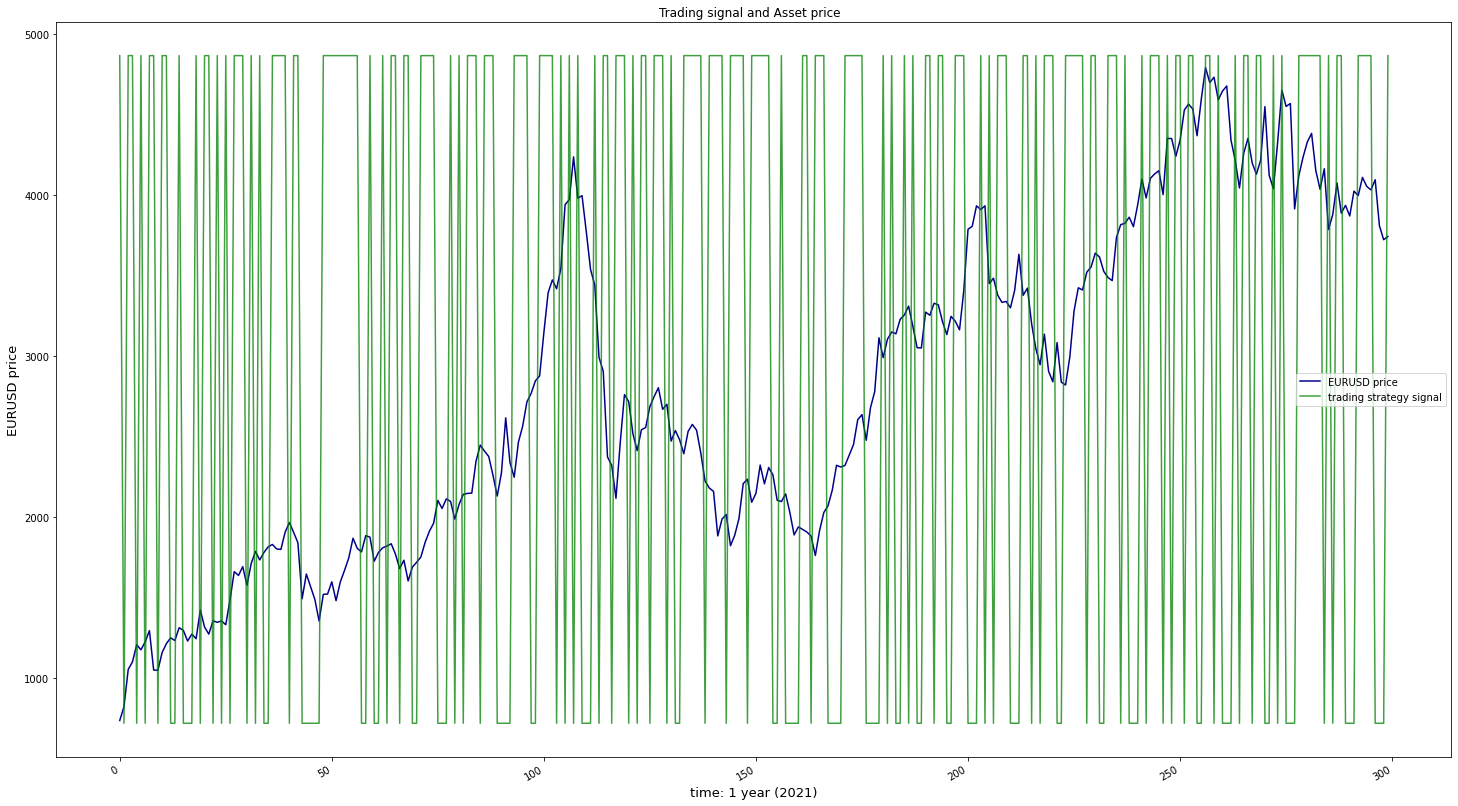

In [ ]:
plot_price_and_signal(price = df['close'] ,signal = signal)

In [ ]:
pd.Series(signal).map({False:max(df['close']),True:min(df['close'])})

date
2021-01-01 00:01:00    4867.96
2021-01-01 00:02:00    4867.96
2021-01-01 00:03:00    4867.96
2021-01-01 00:04:00    4867.96
2021-01-01 00:05:00    4867.96
                        ...   
2021-12-31 07:14:00    4867.96
2021-12-31 07:15:00    4867.96
2021-12-31 07:16:00    4867.96
2021-12-31 07:17:00    4867.96
2021-12-31 07:18:00    4867.96
Length: 524598, dtype: float64

In [ ]:
import datetime
  
# initializing date
test_date = datetime.datetime(2021, 1, 1)
               
# printing original date
print("The original date is : " + str(test_date))
  
# initializing K 
K = 365
  
# timedelta() gets successive dates with 
# appropriate difference
res = [test_date + datetime.timedelta(days=idx) for idx in range(K)]
  
# printing result
print("Next K dates list : " + str(res[-10:]))

The original date is : 2021-01-01 00:00:00
Next K dates list : [datetime.datetime(2021, 12, 22, 0, 0), datetime.datetime(2021, 12, 23, 0, 0), datetime.datetime(2021, 12, 24, 0, 0), datetime.datetime(2021, 12, 25, 0, 0), datetime.datetime(2021, 12, 26, 0, 0), datetime.datetime(2021, 12, 27, 0, 0), datetime.datetime(2021, 12, 28, 0, 0), datetime.datetime(2021, 12, 29, 0, 0), datetime.datetime(2021, 12, 30, 0, 0), datetime.datetime(2021, 12, 31, 0, 0)]


In [ ]:
df_benchmark.index[0]

'01/04/2021'

### <span style='color:Blue'> Performance against benchmark: alpha & beta </span>

In [ ]:
def std_dev(data):
    # Get number of observations
    n = len(data)
    # Calculate mean
    mean = sum(data) / n
    # Calculate deviations from the mean
    deviations = sum([(x - mean)**2 for x in data])
    # Calculate Variance & Standard Deviation
    variance = deviations / (n - 1)
    s = variance**(1/2)
    return s

In [ ]:
def sharpe_ratio(data, risk_free_rate=0.0):
    # Calculate Average Daily Return
    mean_daily_return = sum(data) / len(data)
    # Calculate Standard Deviation
    s = std_dev(data)
    # Calculate Daily Sharpe Ratio
    daily_sharpe_ratio = (mean_daily_return - risk_free_rate) / s
    # Annualize Daily Sharpe Ratio
    sharpe_ratio = 252**(1/2) * daily_sharpe_ratio
    
    return sharpe_ratio

In [ ]:
df_benchmark = pd.DataFrame()
df_benchmark['Daily Return'] = benchmark_data.pct_change() 
df_benchmark.dropna(inplace=True)
shape_rateo_benchmark = sharpe_ratio(df_benchmark['Daily Return'],risk_free_rate=0.0)


print(shape_rateo_benchmark)

2.0157787274864276


In [ ]:
# shape rateo
if trading_strategy_gain[-1] != trading_strategy_gain[0]:
    df_trading = pd.DataFrame()
    df_trading['trading strategy'] = trading_strategy_gain
    df_trading['Daily Return'] = df_trading['trading strategy'].pct_change() 
    df_trading.dropna(inplace=True)
    shape_rateo_trading_strategy = sharpe_ratio(df_trading['Daily Return'],risk_free_rate=0.00)
    print(shape_rateo_trading_strategy)

### Alpha

In [ ]:
investment = 100_000

benchmark_gain = (benchmark_data[-1] / benchmark_data[0])*100 - 100
print('absolute gain benchmark:\t\t',round(benchmark_gain,2),' %')

absolute_gain_trading_strategy = (trading_strategy_gain[-1] / trading_strategy_gain[0])*100-100
print('absolute gain trading strategy :\t',round(absolute_gain_trading_strategy,2),' %')

alpha = absolute_gain_trading_strategy - benchmark_gain # % 
print('Alpha: \t\t\t',round(alpha,2),' %')

absolute gain benchmark:		 28.79  %
absolute gain trading strategy :	 0.0  %
Alpha: 			 -28.79  %


In [ ]:
def get_alpha(trading_strategy_gain_array, benchmark_absolute_gain):
    trading_strategy_absolute_gain = (trading_strategy_gain_array[-1] / trading_strategy_gain_array[0])*100-100
    alpha = trading_strategy_absolute_gain - benchmark_absolute_gain # % 
    return alpha

get_alpha(trading_strategy_gain,benchmark_gain)

-28.793049869617505

### Beta

In [ ]:
TS_data = pd.Series(trading_strategy_gain)
log_returns_benchmark = np.log(benchmark_data/benchmark_data.shift())

print( TS_data,'\n' ,log_returns_benchmark)

0      100000
1      100000
2      100000
3      100000
4      100000
        ...  
247    100000
248    100000
249    100000
250    100000
251    100000
Length: 252, dtype: int64 
 Date
01/04/2021         NaN
01/05/2021    0.007058
01/06/2021    0.005694
01/07/2021    0.014738
01/08/2021    0.005477
                ...   
12/27/2021    0.013744
12/28/2021   -0.001011
12/29/2021    0.001401
12/30/2021   -0.002994
12/31/2021   -0.002630
Name: Close, Length: 252, dtype: float64


In [ ]:
log_returns_TS = np.log(TS_data/TS_data.shift())
log_returns_TS

0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
247    0.0
248    0.0
249    0.0
250    0.0
251    0.0
Length: 252, dtype: float64

In [ ]:
var_benchmark = log_returns_benchmark.var()
var_TS = log_returns_TS.var()

print(var_TS/var_benchmark)

0.0


In [ ]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))

    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

cov = covariance(log_returns_benchmark.dropna(),log_returns_TS.dropna())
print(cov)

0.0


In [ ]:
def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    if denominator == 0:
        return 0
    cor = numerator/denominator
    return cor

cor = correlation(log_returns_benchmark.dropna(),log_returns_TS.dropna())
print(cor)

0


In [ ]:
beta = cor / var_benchmark
print(beta)

0.0


In [ ]:
len(trading_strategy_gain)

252

In [ ]:
print( type(benchmark_data) , type(trading_strategy_gain) )

<class 'pandas.core.series.Series'> <class 'list'>


In [ ]:
len(benchmark_data)

252

In [ ]:
df_trading = pd.DataFrame()
df_trading['trading strategy'] = trading_strategy_gain
df_trading['Daily Return'] = df_trading['trading strategy'].pct_change()

In [ ]:

(beta, alpha) = stats.linregress(df_benchmark['Daily Return'][1:], np.array(df_trading['Daily Return'][1:-1]))[0:2]
print(beta, alpha)

0.0 0.0


In [ ]:
def get_beta(df_benchmark,df_trading):
    (beta, alpha) = stats.linregress(df_benchmark['Daily Return'][:-1], np.array(df_trading['Daily Return']))[0:2]
    return beta


In [ ]:
log_returns_TS.shape

(252,)

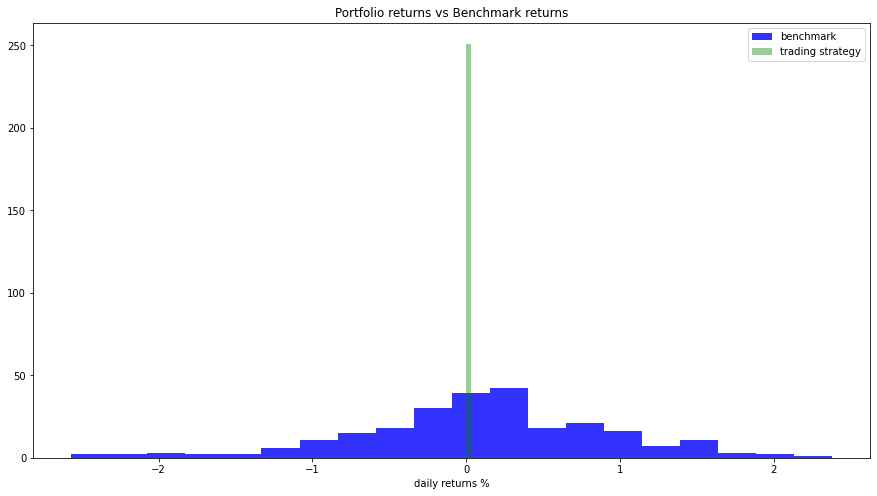

In [ ]:
def plot_gains(df_trading, df_benchmark):
    plt.figure(figsize=(15,8))
    plt.hist(df_benchmark['Daily Return']*100 , bins=20, alpha=0.8, label='benchmark',color='blue')
    plt.hist(df_trading['Daily Return']*100 , bins=30, alpha=0.4, label='trading strategy',color='green')
    plt.legend(loc='upper right')
    plt.xlabel("daily returns %")
    plt.ylabel("")
    plt.title("Portfolio returns vs Benchmark returns")
    plt.savefig(ROOT_PATH+f"/runs/experiment_{experiment_number}/bot_{number_of_plots}_trading_gains.png")

plot_gains(df_trading, df_benchmark)


In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(df_benchmark['Daily Return'][1:]*100, df_trading['Daily Return'][1:]*100,color='blue')
plt.xlabel("Benchmark daily returns %")
plt.ylabel("Portfolio daily returns %")
plt.title("Portfolio returns vs Benchmark returns")

/home/kobayashi/Documents/finance/redpanda/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 250 and the array at index 1 has size 251

<Figure size 1080x576 with 0 Axes>

In [ ]:
type(df_benchmark['Daily Return'])

pandas.core.series.Series

In [ ]:
final_df.columns

Index(['ema-14-@', 'sd-39-@', 'sma-13-@', 'roc-45-@', 'sd-6-@'], dtype='object')

In [ ]:
def extract_logic_string(logic):
    return logic.replace("final_df['"," ").replace("'].all()"," ")

In [ ]:
def save_parameters(input_text:str='Test',
    n_experiment:str ='0',
    n_rules : str ='0'):


    if type(input_text) != str:
        input_text = str(input_text)    

    if type(n_rules) != str:
        n_rules = str(n_rules)

    if type(n_experiment) != str:
        n_experiment = str(n_experiment)      

    if not os.path.exists(ROOT_PATH +'/runs/experiment_' + str(experiment_number)):
        os.makedirs(ROOT_PATH +'/runs/experiment_' + str(experiment_number))
        f = open(ROOT_PATH +'/runs/experiment_' + str(experiment_number) + f"/bot_{number_of_plots}_parameters.txt" , "x")
        f.write(input_text)
    
    else:
        f = open(ROOT_PATH +'/runs/experiment_' + str(experiment_number) + f"/bot_{number_of_plots}_parameters.txt" , "w")
        f.write(input_text)

    plt.savefig(ROOT_PATH + f"/runs/experiment_{experiment_number}/bot_{number_of_plots}_parameters.txt")

    f.close()

save_parameters( input_text = 't' ,
                n_experiment=experiment_number)

ValueError: Format 'txt' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
signal = np.array([])
if signal.any():
    print('hello')

In [ ]:
signal

array([], dtype=float64)

0 0
1 0
2 0
3 0
strategy found
{'logic': " (  sma-42-@']  <  sma-18-@'] ) ", 'equations': "{'roc-35': {'equation': sin(x)**3 - 5*cos(x)**3 - 4/cos(x)**5 + sin(x)**(-5), 'eq_family': 'periodical'}, 'ema-40': {'equation': sin(x)**7 - 2*cos(x)**7, 'eq_family': 'periodical'}, 'sd-32': {'equation': -0.387755102040816*x**9 - 0.306122448979592/x**5 + 0.795918367346939/x**8, 'eq_family': 'poly'}, 'sma-42': {'equation': 6*sin(x)**6 - 3*cos(x)**6 - 1/cos(x)**4 + 6/sin(x)**4, 'eq_family': 'periodical'}, 'sma-18': {'equation': x, 'eq_family': 'periodical'}}", 'normalization_methods': {'roc-35-@': 'n2', 'ema-40-@': 'n1', 'sd-32-@': 'n1', 'sma-42-@': 'n6', 'sma-18-@': 'n2'}, 'take_profit': 0.01417217217217217, 'stop_loss': 0.017833833833833832, 'fitness': 1.3521391508322504, 'shape_rateo': 1.3521391508322504}
NEW TRADING STRATEGY!
shape rateo  1.3521
saved

4 1
5 1


KeyboardInterrupt: 

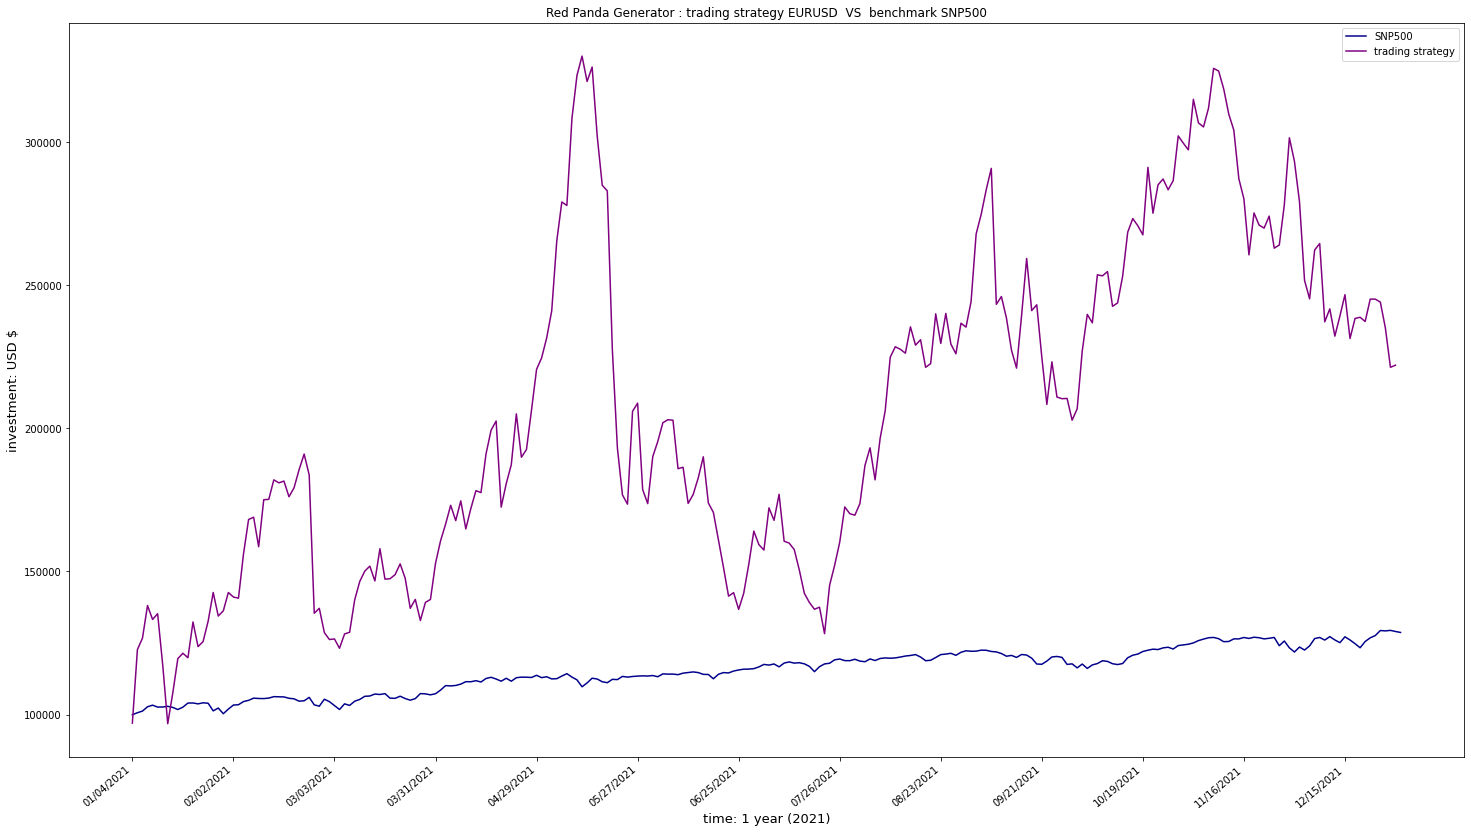

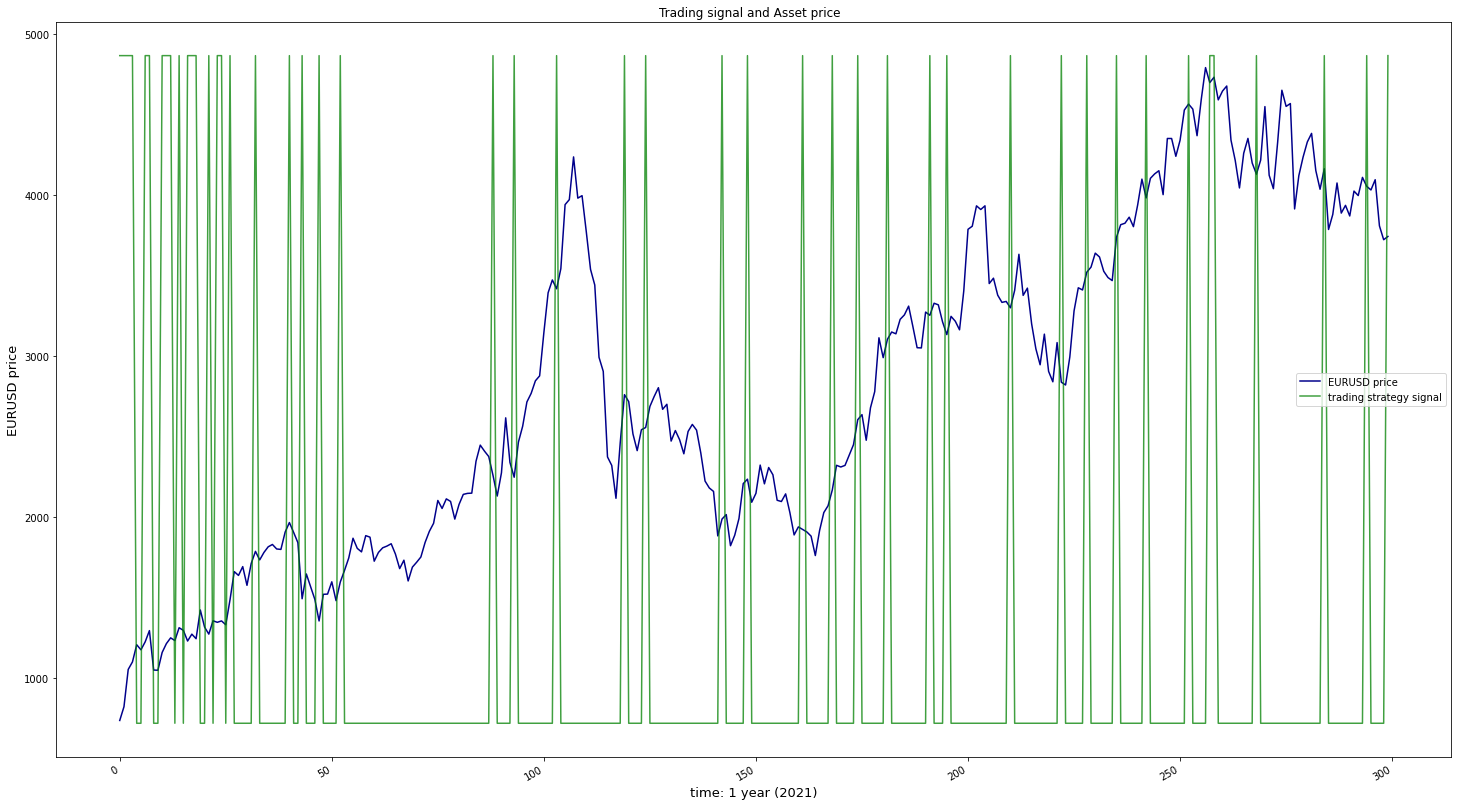

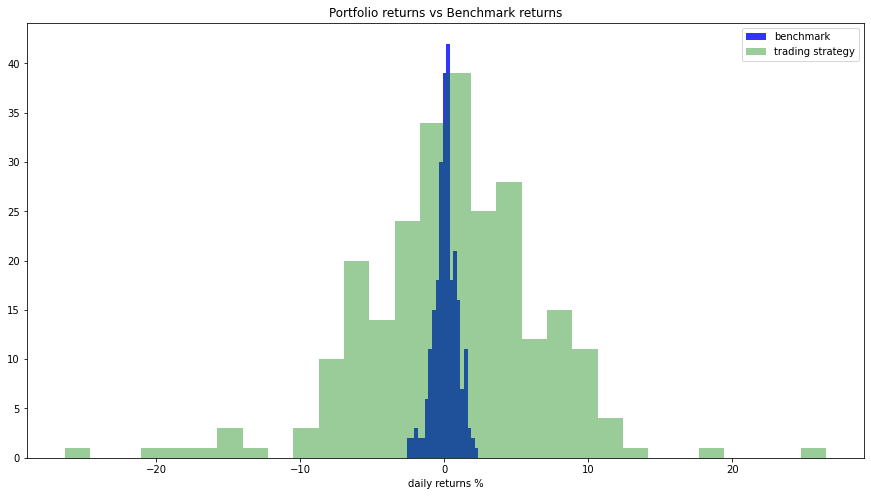

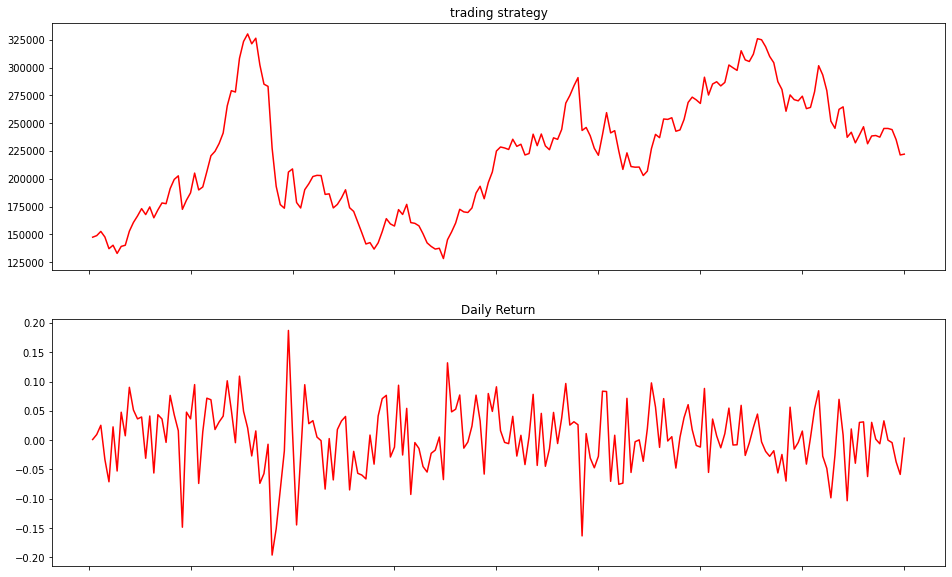

In [ ]:
import time

POP_SIZE = 100
GENERATIONS = 10
POPULATION = []
MUTATION_RATE = []
SELECTION_STARTING_FITNESS = shape_rateo_benchmark * 0.5

n_points_plot = len(df_benchmark) # number of points to plot
gabmling_space = np.linspace(0.0005,0.03,1000)

n_element = 0 
name_df_ram = 'final_df'
exec(name_df_ram + ' = final_df')    


if not os.path.exists(ROOT_PATH +'/runs/experiment_' + str(experiment_number)):
    os.makedirs(ROOT_PATH +'/runs/experiment_' + str(experiment_number))


while len(POPULATION) < POP_SIZE:
    
    take_profit = rnd.choice(gabmling_space)
    stop_loss = rnd.choice(gabmling_space)
    
    indicators = random_indicators( num = 5 )

    new_df = pd.DataFrame()
    for indicator in indicators:
        new_df[indicator] = compute_financial_indexes(df,indicator)

    sympy_df, equations = math_generator( seed_df = new_df, indicators_list = indicators )
    
    final_df = pd.DataFrame()

    normalization_methods = {}
    for idx in sympy_df.columns:
        normalization_method = available_normalizations[rnd.randint(0,len(available_normalizations)-1)]
        final_df[idx] = pd.Series(apply_normalization( sympy_df[idx] , normalization_method))
        normalization_methods[idx] = normalization_method

    logic = generate_logic_rules(dataframe_name = name_df_ram ,names = final_df.columns)
    time.sleep(1)
    
    signal = np.array([])
    
    try:
        signal = eval(logic) # EVALUATION 
    except:
        pass
    
    #print(f"dead {n_element-len(POPULATION)} alive {len(POPULATION)} survival {round((len(POPULATION))/n_element*100,2)}%")
    print(n_element,len(POPULATION))
    n_element += 1

    if signal.any():
        print('strategy found')
        df['signal'] = signal
        df['trading strategy'] = backtest( df )

        if df['trading strategy'][-1] != df['trading strategy'][0] and signal.value_counts(True)[0] > 0.01 and signal.value_counts(True)[0] < 0.99:

            idx = list(range( 0 ,len(df['trading strategy']), math.floor(len(df['trading strategy'])/n_points_plot) ))
            trading_strategy_gain = [df['trading strategy'][i] for i, _ in enumerate(df['trading strategy']) if i in idx][1:]
            df_trading = pd.DataFrame()
            df_trading['trading strategy'] = trading_strategy_gain


            df_trading['Daily Return'] = df_trading['trading strategy'].pct_change() 
            df_trading.dropna(inplace=True)
            shape_rateo_trading_strategy = sharpe_ratio(df_trading['Daily Return'],risk_free_rate=0.00)

            plot_strategy_vs_benchmark(trading_strategy = trading_strategy_gain , benchmark=benchmark_data)
            plot_price_and_signal(price = df['close'] ,signal = signal)
            plot_gains(df_trading, df_benchmark)
            plot_indicators(df_trading)
            number_of_plots+=1


            logic_str = logic.replace("final_df['"," ").replace("'].all()"," ")

            TRADING_RULES = {"logic" : logic_str ,
                                "equations" : str(equations),
                                "normalization_methods" : normalization_methods,
                                "take_profit" : take_profit,
                                "stop_loss" : stop_loss,
                                "fitness":shape_rateo_trading_strategy,
                                "shape_rateo" : shape_rateo_trading_strategy}                
                

            save_parameters( input_text = str(TRADING_RULES) ,
                            n_experiment = experiment_number)


            
            if shape_rateo_trading_strategy > SELECTION_STARTING_FITNESS:


                POPULATION.append(TRADING_RULES)

                print(TRADING_RULES)
                print('NEW TRADING STRATEGY!')   
                print('shape rateo ',round(shape_rateo_trading_strategy,4))


                print('saved\n')

###########################################################################################################################################################

# for n_generation in range(2,len(GENERATIONS)+1):        
#     CHILDRENS = deepcopy(POPULATION)
    
#     # cross over
#     for child_id in range(len(CHILDRENS)):
#         CROSS_OVER_RATE = CHILDRENS[child_id]['shape_rateo']
#         if rnd.random()>CROSS_OVER_RATE:
#             CHILDRENS[child_id] = cross_over(CHILDRENS[child_id])

#     # mutate
#     for child_id in range(len(CHILDRENS)):
#         if rnd.random()>MUTATION_RATE:
#             CHILDRENS[child_id] = mutate(CHILDRENS[child_id])
   
#     # selection
#     for n_element in range(1,len(POP_SIZE)+1):
#         take_profit = CHILDRENS[n_element]['take_profit']
#         stop_loss = CHILDRENS[n_element]['stop_loss']
#         indicators = CHILDRENS[n_element]['equations'].keys()
        
#         new_df = pd.DataFrame()
        
#         for indicator in indicators:
#             new_df[indicator] = compute_financial_indexes(df,indicator)

#         sympy_df, equations = math_generator( seed_df = new_df, indicators_list = indicators )
        
#         final_df = pd.DataFrame()

#         normalization_methods = {}
#         for idx in sympy_df.columns:
#             normalization_method = available_normalizations[rnd.randint(0,len(available_normalizations)-1)]
#             final_df[idx] = pd.Series(apply_normalization( sympy_df[idx] , normalization_method))
#             normalization_methods[idx] = normalization_method

#         time.sleep(0.3)
        
#         signal = np.array([])
#         logic = CHILDRENS[n_element]['logic']
#         try:
#             signal = eval(logic) # EVALUATION 
#         except:
#             pass
            
#         if signal.any():

#             df['signal'] = signal
#             df['backtest'] = backtest( df ) # DEPLOY

#             # STATISTICS: shape rateo
#             if df['backtest'][-1] != df['backtest'][0]:

#                 idx = list(range( 0 ,len(df['backtest']), math.floor(len(df['backtest'])/n_points_plot) ))
#                 trading_strategy_gain = [df['backtest'][i] for i, _ in enumerate(df['backtest']) if i in idx][1:]
                
#                 df_trading = pd.DataFrame()
#                 df_trading['trading strategy'] = trading_strategy_gain
#                 df_trading['Daily Return'] = df_trading['trading strategy'].pct_change() 
#                 df_trading.dropna(inplace=True)

#                 shape_rateo_trading_strategy = sharpe_ratio(df_trading['Daily Return'],risk_free_rate=0.00)
                
#                 if shape_rateo_trading_strategy > shape_rateo_benchmark*0.5:
#                     POPULATION.append(TRADING_RULES)

#                     TRADING_RULES = {"logic" : logic_str ,
#                                     "equations" : str(equations),
#                                     "normalization_methods" : normalization_methods,
#                                     "take_profit" : take_profit,
#                                     "stop_loss" : stop_loss,
#                                     "fitness":shape_rateo_trading_strategy,
#                                     "shape_rateo" : shape_rateo_trading_strategy}
        
#                     print('\nNEW TRADING STRATEGY!')   
#                     print('shape rateo ', shape_rateo_trading_strategy )
#                     pprint(TRADING_RULES,'\n')